# AFC Data Explorer  
  
The [Age Friendly Communities (AFC)](http://www.sandiegodata.org/projects/age-friendly-communities/) project requires several key datasets (pulled from a variety of data sources) to answer the data questions that are part of it. This document is intended as a guide to the aggregated AFC dataset as well as a record of any analysis and visualizations applied to this dataset in answering the data questions.  
  
## Overview  
  
The exploratory analysis detailed in the rest of the document attempt to answer questions under **Data Questions**. These questions and additional contextual information can be found in this [document](https://drive.google.com/drive/u/2/folders/0BxnSJoCKXnSUTC1VbU5veGdJRnc).  Details of the analysis along with visualizations pertaining to each data question are under **Analysis**.  A summary of the insights drawn from the analysis including notes on additional work needed to be carried out and caveats (if any) can be found under **Conclusions**.

### Data Questions
  
**A**. **RCFE Capacity**

1. What is the number of RCFEs in a given community as defined above?
2. What is the capacity (by licensed bed) in a given community?
3. How many of the RCFEs in a given community participate in the Assisted Living Waiver Program (ALWP)? 

**B**. **65+ Population**

1. In each community, what is the current population of 65+?
2. Can population estimates for the 65+ population in 2030 be located for each community? 

**C**. **San Diego’s Alzheimer’s Population**

1. Based on current and future projections for San Diego residents with ADOD,how does the current RCFE capacity compare?

**D**. **Low-Income Seniors**

1. Identify %s of low-income seniors in each given community.
2. What is the RCFE capacity in areas with greater % of low-income 65+ residents?
3. How many RCFEs are participating in the ALWP in areas with greater % of low-income 65+ residents?
4. Are there less RCFEs (in terms of number & various licensed bed capacity) in communities with greater % of low-income 65+?
5. Do communities with greater % of low-income 65+ have higher prevalence of ADOD?

**E**. **Race**

1. Are there less RCFEs (in terms of number & various licensed bed capacity) in communities with greater % of certain minority populations?
2. Are communities with greater % of certain minority populations less likely to be able to afford RCFE services?
3. Do communities with greater % of certain minority populations have higher prevalence of ADOD?

In [6]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab, mlab, gridspec
from IPython.core.pylabtools import figsize, getfigs
from IPython.display import display, HTML
from pylab import *

# GLOBALS

# working directory
CWD = os.getcwd()

# Data File(s)
VERSION = "20170125"
DATAFILE = "afc_" + VERSION + ".csv"

datapath = os.path.join(CWD,DATAFILE)

# read the data file into a data frame
df = pd.read_csv(datapath)

### Data Summary  
  
The AFC dataset was generated using data (wholly or partially) from a number of disparate data sources aggregated along the following geographical IDs (where possible) specific to the San Diego county:  
* SRA 
* Zipcode
* ZCTA 

For a list of the individual data sources that contributed to the AFC aggregated dataset please see this [resource](https://docs.google.com/spreadsheets/d/1lSl4fonpc7weneEJ8NMbbL5S7rTC7GvpGA4Hme0VATY/edit?pli=1#gid=0).

In [5]:
# a custom definition of an info method callable on a series
def sinfo(x):
    xu = x.unique()
    l = len(x)
    typ = str(np.array(xu.tolist()).dtype) + " "
    nans = "null: " + str(l - x.count()) + " "
    lgt = "len: " + str(l) + " "
    unq = "unq: " + str(len(xu))
    return (typ+nans+lgt+unq)

# function to output summary information (dimensions,data types among others) for 
# the specified dataframe
def summarize(df):
    # output the number of rows and cols of the data frame
	print "Dimensions: {}".format(df.shape)
    # print the variables, the number of unique values and a list of unique values for each col
	print "{}".format(df.apply(lambda x:(sinfo(x),x.unique())))
    
summarize(df)

df.head()

Dimensions: (158, 26)
SRA                             (|S23 null: 0 len: 158 unq: 41, [Vista, Laguna...
Region                          (|S13 null: 0 len: 158 unq: 6, [North Coastal,...
Zipcode                         (int64 null: 0 len: 158 unq: 116, [92081, 9208...
ZCTA                            (int64 null: 0 len: 158 unq: 114, [92081, 9208...
NumRCFE                         (int64 null: 0 len: 158 unq: 42, [11, 15, 46, ...
NumRCFEBeds                     (float64 null: 1 len: 158 unq: 90, [192.0, 201...
NumRCFEInALWP                   (int64 null: 0 len: 158 unq: 9, [1, 0, 2, 5, 6...
2012Pop65Over                   (int64 null: 0 len: 158 unq: 38, [0, 10527, 94...
2012Pop55Over                   (int64 null: 0 len: 158 unq: 38, [0, 21056, 20...
2030Pop65Over                   (int64 null: 0 len: 158 unq: 37, [0, 18489, 19...
2030Pop55Over                   (int64 null: 0 len: 158 unq: 38, [0, 30059, 30...
2012PopADOD55Over               (|S4 null: 0 len: 158 unq: 37, [0, 2313, 5, 

,SRA,Region,Zipcode,ZCTA,NumRCFE,NumRCFEBeds,NumRCFEInALWP,2012Pop65Over,2012Pop55Over,2030Pop65Over,...,2012ADODPerRCFE,2030ADODPerRCFE,2012PercentLowIncome65Over,2012PercentLowIncome55Over,2012LowIncome65OverPerRCFE,2012LowIncome55OverADODRatio,PopMinorityPerRCFE,PopMinorityADODRatio,2012MedianHHIncome,2012MedianHHIncome65Over
0,Vista,North Coastal,92081,92081,11,192.0,1,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55071,45104
1,Vista,North Coastal,92083,92083,15,201.0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
2,Vista,North Coastal,92084,92084,46,568.0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
3,Vista,North Coastal,0,0,72,961.0,1,10527,21056,18489,...,32.13,43.96,8.17,7.29,11.94,0.66,777.71,24.21,55071,45104
4,Laguna-Pine Valley,East,91916,91916,0,0.0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44969,43952


**NOTES**  
  
* San Diego county has 6 unique Regions, 41 SRAs and a 100+ Zipcodes and ZCTAs each. Each Region contains one or more SRAs which in turn are comprised of one or more Zipcodes. Zipcodes and ZCTAs are mostly synonomous with a rare ZCTA overlapping more than one Zipcode.  
* All data is available on a per SRA basis while some data are available on a per zipcode basis. Some data (e.g.: population estimates) have intentionally been downloaded at the SRA level since SRA was the lowest common denominator for most datasets.  
* <font color='red'>Rows with zipcode/zcta set to 0 represent the SRA-wide data; such data are aggregates of per zipcode data for a given SRA.</font>

#### Visualizations  
  
Below visualizations are here as an aid to explore the dataset further prior to any additional analysis.    

In [106]:
# group by Region
df_g_region = df.groupby('Region')

# compute counts for key indicators for each group
indices = []
cols = ['NumRCFE','NumRCFEBeds','NumRCFEInALWP','2012Pop65Over','2030Pop65Over',
        '2012PopMinority','2012MedianHHIncome','2012MedianHHIncome65Over','2012PopLowIncome65Over']
# create a 2-D array to hold information for each group
dim = (len(df_g_region.groups),len(cols))
data = np.zeros(dim, dtype=np.float)
pos = 0

for region, group in df_g_region:
    
    indices.append(region)
    
    sra_data = group[group['Zipcode'] == 0]
    #display(sra_data)
    
    sra_data_sum = sra_data[cols].sum(axis=0).to_frame().T
    #display(sra_data_sum)
        
    data[pos] = sra_data_sum.values
    pos = pos + 1

df_region = pd.DataFrame(data=data,columns=cols,index=indices)
df_region = df_region.apply(lambda x: x.astype(int))
display(df_region) 

# convert population and income data to kilo units
df_region[cols[3:]] = df_region[cols[3:]].apply(lambda x: x/1000)
df_region['NumRCFEBeds'] = df_region['NumRCFEBeds'].apply(lambda x: int(x/100))

# convert to long format for visualization
df_region = df_region.T
region_list = df_region.columns.tolist()

,NumRCFE,NumRCFEBeds,NumRCFEInALWP,2012Pop65Over,2030Pop65Over,2012PopMinority,2012MedianHHIncome,2012MedianHHIncome65Over,2012PopLowIncome65Over
Central,108,1607,3,16488,41996,217067,116920,71453,6421
East,200,5121,1,58209,108215,170686,714472,507167,9867
North Central,189,3817,7,61500,131679,199803,750232,626076,2973
North Coastal,184,6027,8,63348,117628,195750,310686,201005,3052
North Inland,271,7463,15,77559,139352,251448,732062,748747,6015
South,128,3173,1,49953,100009,365047,317281,250268,7243


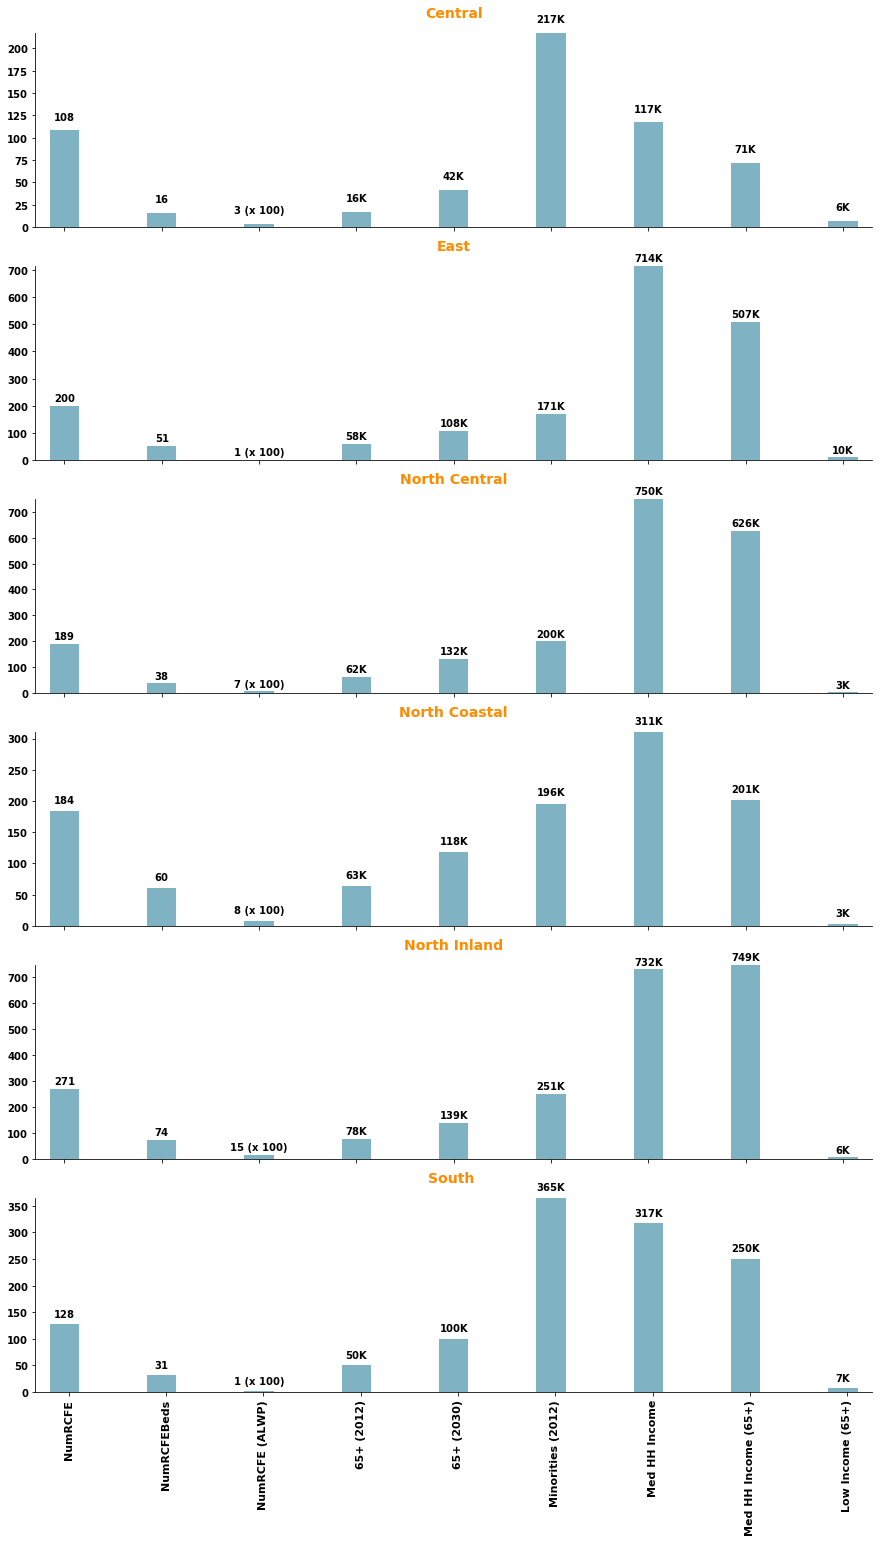

In [100]:
# this configuration below prevents pylab from importing anything into the global namespace
# needed to prevent user warning about namespace clashes 
#%config InteractiveShellApp.pylab_import_all = False
#%pylab inline
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['font.weight'] = 'bold'

# plot the above in a bar graph 
width = 0.3
labels = ['NumRCFE','NumRCFEBeds','NumRCFE (ALWP)','65+ (2012)','65+ (2030)','Minorities (2012)',
          'Med HH Income','Med HH Income (65+)','Low Income (65+)']
pos = np.arange(len(labels))
x_ticks_pos = pos + (0.15 * width)

num_regions = len(region_list)
fig, axes = plt.subplots(num_regions, 1, figsize=(15, 25))

for i,region in enumerate(region_list):
    
    plot_vals = df_region[region]
    bars = axes[i].bar(pos,plot_vals,width,color='#00688B',alpha=0.5)
    
    for j, bar in enumerate(bars):
        ht = bar.get_height()
        bar_pos = bar.get_x() + bar.get_width()/2.
        ht = ((ht+1) * -50) if plot_vals[j] < 0 else ht+10
        txt = '{:.0f}K'.format(plot_vals[j]) if j>2 else '{:.0f}'.format(plot_vals[j])
        txt = '{:.0f} (x 100)'.format(plot_vals[j]) if j==2 else txt
        axes[i].text(bar_pos, ht, txt, ha='center', va='bottom')

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
        
    axes[i].set_xlim(min(pos)-width, max(pos)+width)
    axes[i].set_ylim([0, max(plot_vals)] )

    title = region
    axes[i].set_title(title,fontsize=14, fontweight='bold',color='#FF8C00')
    axes[i].title.set_position([.5,1.05])
    #axes[i].grid(True)
    
    if i == (num_regions-1):
        axes[i].set_xticks(x_ticks_pos)
        axes[i].set_xticklabels(labels,rotation=90,fontsize=11, fontweight='bold')
    else:
        axes[i].tick_params(axis='x',labelbottom='off')
        
    axes[i].margins(0.3, 0)    
    
plt.show()


### Analysis
<br><font color='red'><b><i>To be completed.</i></b></font>  

### Conclusions  
<br><font color='red'><b><i>To be completed.</i></b></font>    



**Tested for Python versions**: Python 2.7.12 :: Anaconda custom (64-bit)